<a href="https://colab.research.google.com/github/lcsbiffi/projetoTera_evasaoescolar/blob/main/Projeto_Tera_Evas%C3%A3o_Escolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Tera - Evasão Escolar

**Problema**

Prever a evasão escolar e suas principais variáveis para que gestores escolares atuem ativamente em políticas de combate.


**Hipóteses**

1) As principais variáveis de evasão estão relacionadas a renda familiar.

2) A variável de transporte está diretamente relacionada à evasão.

3) Maternidade e paternidade na adolescência está entre as principais variáveis de evasão.

4) A falta de professores está relacionada a evasão.

## Carregando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark.pandas as ps

ModuleNotFoundError: No module named 'pyspark'

## Importando bancos de dados

In [13]:
ideb = pd.read_csv('.\BDs\ideb_escola.csv')
inep = pd.read_csv('.\BDs\inep.csv')

In [3]:
#censo = pd.read_csv('.\BDs\censo_escolar.csv', nrows=1000)

## Analisando o df do Ideb

**Legenda**

*ano* - Ano

*sigla-uf* - Sigla da Unidade da Federação

*id_município* - ID Município - IBGE 7 Dígitos

*id_escola* - ID Escola

*rede* - Rede Escolar

*ensino* - Tipo de Ensino (fundamental ou médio)

*anos_escolares* - Anos escolares (Iniciais (1-5), Finais (6-9), Todos (1-4) <- Ensino Médio)

*taxa_aprovação* - Taxa de Aprovação (0 a 100)

*indicador_rendimento* - Indicador de Rendimento (P)

*nota_saeb_matematica* - Nota SAEB - Matemática

*nota_saeb_lingua_portuguesa* - Nota SAEB - Português

*nota_saeb_media_padronizada* - Nota SAEB - Média Padronizada (N)

*ideb* - IDEB (Média Padronizada (N) X Indicador de Rendimento (P)

*projecao* - Projeção (sei lá)

In [24]:
ideb.head()

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,AC,1200013,12008966,municipal,fundamental,finais (6-9),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,AC,1200013,12008966,municipal,fundamental,iniciais (1-5),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,AC,1200013,12009156,municipal,fundamental,finais (6-9),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,AC,1200013,12009156,municipal,fundamental,iniciais (1-5),NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,AC,1200013,12009164,estadual,fundamental,finais (6-9),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ideb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027767 entries, 0 to 1027766
Data columns (total 14 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   ano                          1027767 non-null  int64  
 1   sigla_uf                     1027767 non-null  object 
 2   id_municipio                 1027767 non-null  int64  
 3   id_escola                    1027767 non-null  int64  
 4   rede                         1027767 non-null  object 
 5   ensino                       1027767 non-null  object 
 6   anos_escolares               1027767 non-null  object 
 7   taxa_aprovacao               619628 non-null   float64
 8   indicador_rendimento         619580 non-null   float64
 9   nota_saeb_matematica         488139 non-null   float64
 10  nota_saeb_lingua_portuguesa  488139 non-null   float64
 11  nota_saeb_media_padronizada  556480 non-null   float64
 12  ideb                         556306 non-nu

Temos valores NaN nas seguintes colunas:

- taxa_aprovacao
- indicador_rendimento
- nota_saeb_matematica
- nota_saeb_lingua_portuguesa
- nota_saeb_media_padronizada
- ideb 
- projecao

In [16]:
ideb.describe(include = 'all').round(1)

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
count,1027767.0,1027767,1027767.0,1027767.0,1027767,1027767,1027767,619628.0,619580.0,488139.0,488139.0,556480.0,556306.0,705363.0
unique,NaN,27,NaN,NaN,4,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,SP,NaN,NaN,municipal,fundamental,iniciais (1-5),NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,130434,NaN,NaN,645582,965727,559242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2013.4,NaN,3088825.9,30875714.7,NaN,NaN,NaN,86.7,0.9,222.2,211.5,5.0,4.4,4.7
std,5.2,NaN,995739.8,9926413.0,NaN,NaN,NaN,11.4,0.1,34.8,37.5,0.9,1.2,1.1
min,2005.0,NaN,1100015.0,11000058.0,NaN,NaN,NaN,0.0,0.0,99.9,103.7,1.4,0.1,0.6
25%,2009.0,NaN,2311306.0,23197269.0,NaN,NaN,NaN,80.5,0.8,196.1,181.7,4.4,3.6,3.9
50%,2013.0,NaN,3114402.0,31044164.0,NaN,NaN,NaN,89.5,0.9,223.9,212.6,4.9,4.3,4.7
75%,2017.0,NaN,3550308.0,35436690.0,NaN,NaN,NaN,95.7,1.0,246.6,239.0,5.6,5.2,5.4


In [17]:
ideb_anos = ideb['ano'].value_counts()
print(ideb_anos)

2017    127983
2019    127983
2021    127983
2005    107303
2007    107303
2009    107303
2011    107303
2013    107303
2015    107303
Name: ano, dtype: int64


Temos dados de escolas nos anos:

- 2005
- 2007
- 2009
- 2011
- 2013
- 2015 (ano com menos observações)
- 2017 (ano com mais observações)
- 2019
- 2021

In [18]:
ideb_ensino = ideb['ensino'].value_counts(normalize=True)*100
print(ideb_ensino)

fundamental    93.963612
medio           6.036388
Name: ensino, dtype: float64


In [19]:
ideb_anos_escolares = ideb['anos_escolares'].value_counts()
print(ideb_anos_escolares)

iniciais (1-5)    559242
finais (6-9)      406485
todos (1-4)        62040
Name: anos_escolares, dtype: int64


Maioria das observações (93%) são de *turmas do Ensino Fundamental*

In [20]:
ideb_em_bool = ideb['anos_escolares'] == 'todos (1-4)'
ideb_em = ideb[ideb_em_bool]
print(ideb_em)

          ano sigla_uf  id_municipio  id_escola      rede ensino  \
643828   2017       AC       1200013   12018422  estadual  medio   
643829   2017       AC       1200013   12021768  estadual  medio   
643835   2017       AC       1200013   12128236  estadual  medio   
643839   2017       AC       1200054   12015946  estadual  medio   
643845   2017       AC       1200104   12016284  estadual  medio   
...       ...      ...           ...        ...       ...    ...   
1027737  2021       TO       1722081   17009995  estadual  medio   
1027742  2021       TO       1722081   17010020  estadual  medio   
1027751  2021       TO       1722107   17010322  estadual  medio   
1027754  2021       TO       1722107   17010330  estadual  medio   
1027764  2021       TO       1722107   17010462  estadual  medio   

        anos_escolares  taxa_aprovacao  indicador_rendimento  \
643828     todos (1-4)            89.7              0.894401   
643829     todos (1-4)            74.6              0.7

Confirmando aqui que o valor *todos (1-4)* da coluna *anos_escolares* se refere ao **ensino médio**

## Arrumando valores NaN em 'taxa_aprovacao'

Primeiro, vamos criar DataFrames separados para cada estado.

In [42]:
# Checando quais as siglas
ideb['sigla_uf'].value_counts()

SP    130434
MG     99678
BA     91995
RS     70107
MA     62844
CE     61152
RJ     57183
PA     54213
PR     47964
PE     47484
SC     39036
GO     32241
PI     30117
PB     27693
AM     23148
RN     21585
MT     20739
AL     19974
ES     18351
SE     14583
MS     14148
TO     12486
RO     10698
DF      6105
AC      5202
AP      4869
RR      3738
Name: sigla_uf, dtype: int64

In [51]:
df_AM = ideb.loc[ideb['sigla_uf'] == "AM"]
df_AM[['taxa_aprovacao', 'indicador_rendimento', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'nota_saeb_media_padronizada', 'ideb']].describe()

,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
count,12207.000000,12204.000000,9565.000000,9565.000000,10983.000000,10983.000000
mean,85.308438,0.850359,209.374421,201.557655,4.727575,4.075990
std,11.029058,0.114087,31.831154,36.294609,0.896721,1.124383
min,0.000000,0.106764,100.160000,109.000000,1.826167,0.600000
25%,79.000000,0.785641,183.690000,170.890000,4.124565,3.300000
50%,87.200000,0.871070,211.020000,200.710000,4.626876,3.900000
75%,94.000000,0.939870,232.440000,230.190000,5.227979,4.800000
max,100.000000,1.000000,396.390000,367.690000,9.374801,8.700000


In [53]:
# testando
ideb_teste = ideb.copy()

for row in ideb_teste:
    if 


,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,AC,1200013,12008966,municipal,fundamental,finais (6-9),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,AC,1200013,12008966,municipal,fundamental,iniciais (1-5),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,AC,1200013,12009156,municipal,fundamental,finais (6-9),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,AC,1200013,12009156,municipal,fundamental,iniciais (1-5),NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,AC,1200013,12009164,estadual,fundamental,finais (6-9),NaN,NaN,NaN,NaN,NaN,NaN,NaN


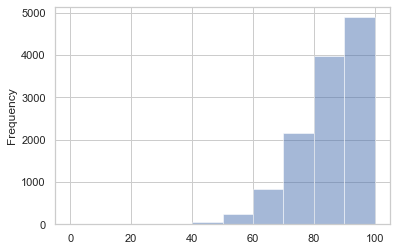

In [44]:
ax = df_AM['taxa_aprovacao'].plot.hist(bins=10, alpha=0.5)

## Checando os estados com maiores taxas de aprovação (CONTINUAR)

In [22]:
ideb_aprov = ideb[['sigla_uf', 'taxa_aprovacao']]
ideb_aprov = ideb_aprov.set_index('sigla_uf')
#teste

## Matriz de correlação (com os dados NaN ainda, só pra ver)

In [23]:
corr = ideb.corr()
corr.style.background_gradient(cmap='coolwarm')

,ano,id_municipio,id_escola,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
ano,1.000000,0.011018,0.010951,0.264246,0.267623,0.348161,0.393844,0.368267,0.405196,0.506271
id_municipio,0.011018,1.000000,0.999820,0.164834,0.162383,0.261862,0.216358,0.306056,0.284877,0.287445
id_escola,0.010951,0.999820,1.000000,0.163462,0.161040,0.259970,0.214760,0.304550,0.283216,0.286083
taxa_aprovacao,0.264246,0.164834,0.163462,1.000000,0.988583,0.148723,0.106126,0.480553,0.773379,0.563586
indicador_rendimento,0.267623,0.162383,0.161040,0.988583,1.000000,0.157676,0.116528,0.477310,0.775296,0.558933
nota_saeb_matematica,0.348161,0.261862,0.259970,0.148723,0.157676,1.000000,0.955514,0.524083,0.432615,0.348091
nota_saeb_lingua_portuguesa,0.393844,0.216358,0.214760,0.106126,0.116528,0.955514,1.000000,0.419509,0.339045,0.281164
nota_saeb_media_padronizada,0.368267,0.306056,0.304550,0.480553,0.477310,0.524083,0.419509,1.000000,0.920521,0.739657
ideb,0.405196,0.284877,0.283216,0.773379,0.775296,0.432615,0.339045,0.920521,1.000000,0.781037
projecao,0.506271,0.287445,0.286083,0.563586,0.558933,0.348091,0.281164,0.739657,0.781037,1.000000
